In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6)
import seaborn as sns

In [ ]:
df=pd.read_csv("Social_Network_Ads.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
# finding numerical variable
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  4


In [ ]:
#no. of categorical variable
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of numerical variables: ', len(categorical_features))

Number of numerical variables:  1


In [ ]:
# check missing values in dataset
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#initializing our inputs and outputs
X = df['Age'].values
y = df['Purchased'].values

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score


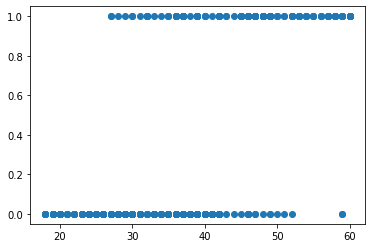

In [ ]:
# Visualizing the dataset
plt.scatter(df['Age'], df['Purchased'])
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
y_train= y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
X_train= X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
# 3. Check the score
model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.875

In [ ]:
model.predict(X_test)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf=confusion_matrix( y_test.reshape(-1, 1),y_pred)

Text(0.5, 1.0, 'Confusion matrix')

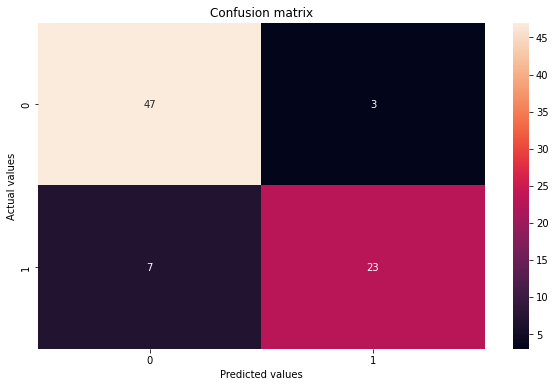

In [ ]:
conf_p=sns.heatmap(conf,annot=True)
conf_p.set_xlabel("Predicted values")
conf_p.set_ylabel("Actual values")
conf_p.set_title("Confusion matrix")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


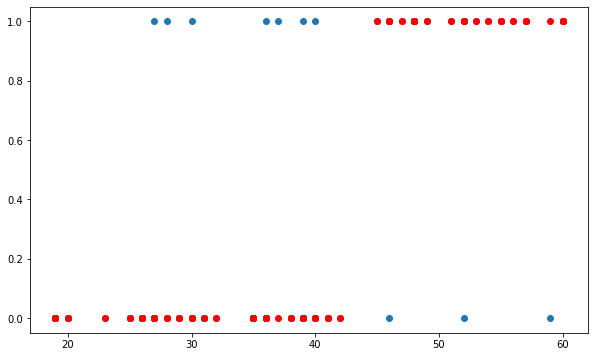

Accuracy = 0.875


In [ ]:
# Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Making predictions
y_pred_sk = lr_model.predict(X_test)
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

# Accuracy
print(f"Accuracy = {lr_model.score(X_test, y_test)}")

In [ ]:
tn, fp, fn, tp=confusion_matrix( y_test,y_pred).ravel()

In [ ]:
fpr=fp/(fp+tn)

In [ ]:
fpr

0.06

In [ ]:
fnr=fn/(tp+fn)

In [ ]:
fnr

0.23333333333333334

In [ ]:
tnr=tn/(tn+fp)

In [ ]:
tnr

0.94

In [ ]:
tpr=tp/(tp+fn)

In [ ]:
tpr

0.7666666666666667

In [ ]:
pr=tp/(tp+fp)

In [ ]:
pr

0.8846153846153846

In [ ]:
acc= (tp+tn)/(tp+fp+tn+fn)

In [ ]:
acc

0.875

In [ ]:
f1=(pr*tpr)/(pr+tpr)
f1

0.41071428571428575

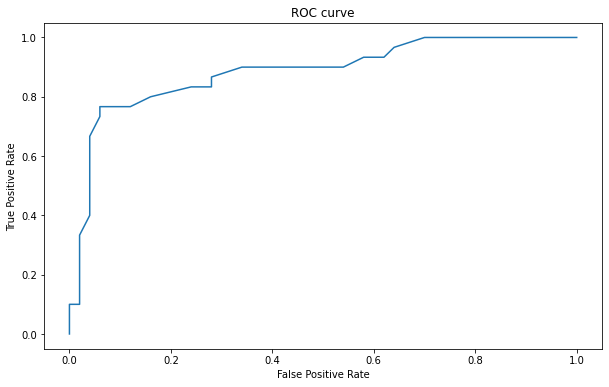

In [ ]:
from sklearn import metrics
y_pred_proba = lr_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

plt.plot(fpr,tpr)
plt.title("ROC curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

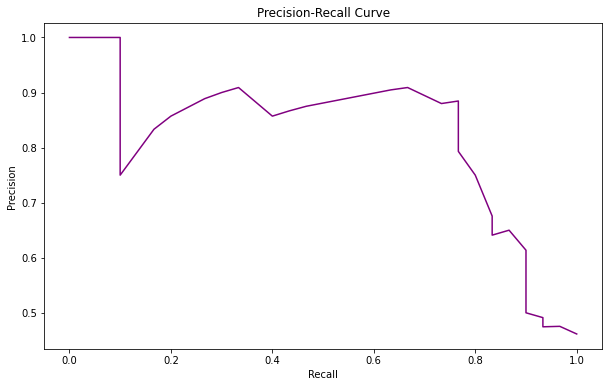

In [ ]:
y_score = lr_model.predict_proba(X_test)[::,1]

precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_score)

plt.plot(recall, precision, color='purple')

#add axis labels to plot
plt.title('Precision-Recall Curve')
plt.ylabel('Precision')
plt.xlabel('Recall')

#display plot
plt.show()